# Исследование закономерностей, определяющих успешность игры

## Изучение данных и общей информации

In [1]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
display(data.head()) # Выведем первые 5 строк 

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info() # Выводим общую информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
print(data.isna().sum()) # Смотрим количество пропусков

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


In [6]:
data.shape # Выведем размер 

(16715, 11)

In [7]:
data.describe() # Выведем статистические данные, которые дают представление о распределении значений

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


<div style="border:solid blue 2px; padding: 20px">
ВЫВОД: в полученном датасете 11 столбцов по 16715 значений имеются пропуски в полседних трех столбацх с рейтингом и в стольце с годами, наименование колонок не приведены к нижнему регистру, типы данных в годах и оценках пользователей логически не верны

## Подготовка данных

### Заменим названия столбцов

In [8]:
list(data.columns) # Посмотрим названия колонок

['Name',
 'Platform',
 'Year_of_Release',
 'Genre',
 'NA_sales',
 'EU_sales',
 'JP_sales',
 'Other_sales',
 'Critic_Score',
 'User_Score',
 'Rating']

In [9]:
for i in data: # Приведем все к нижнему регистру
    
    data = data.rename(columns={i : i.lower()})

In [10]:
data.head() # Проверим

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Преобразуем данные в нужные типы и обработаем пропуски

**Год выпуск должен быть целым числом, пропуски удалим**

In [11]:
data['year_of_release'] = data['year_of_release'].fillna(0) # Заменим пропуски нулями 

In [12]:
data['year_of_release'] = data['year_of_release'].astype(int) # Поменяем тип данных на целые числа

In [13]:
data['year_of_release'].unique() # Проверим

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000,    0, 1995,
       1991, 1981, 1987, 1980, 1983])

**Оценка пользователей приведем к значения флоат и заменим tbd на nan**

In [14]:
data['user_score'].unique() # Посмотрим уникальные значения

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [15]:
data['user_score'].replace('tbd', 'nan', inplace=True) # Заменим tbd на nan

In [16]:
data['user_score'] = data['user_score'].astype("float") #.reset_index() # Поменяем тип данных

In [17]:
data['user_score'].unique() # Проверим

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

**Удалим 2 значения пропущенных в наименованиях**

In [18]:
data[data['name'].isnull()] # Не повлияет на общую картину и упростит дальнейшую обработку

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [19]:
data = data.dropna(subset = ['name']).reset_index() # Удаляем

**Посмотрим уникальные значения колонок с неполными данными**

In [20]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [21]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

*Данные в этих столбцах мы оставим как есть, что бы не менять общюю картину данных, так как удаление приведет к недопустиому сокращению исследовательских данных, замену на медианное ззначение тут не и меет логического смысла*

### Посчитаем суммарные продажи во всех регионах и создадим для них отдельный столбец

In [22]:
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'] # Складываем


In [23]:
data.head() # Проверяем

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [24]:
data.shape # Проверяем размер данных после преобразований

(16713, 13)

<div style="border:solid blue 2px; padding: 20px">
ВЫВОД: причесали датасет, что бы в дальнейшем исследовании не было ошибок преобрзования данных - типы данных приведены к логически верным, наименование столбцов к нижнему регистру для удобства, заменен артефакт tbd, добавлена колонка общих продаж

## Исследовательский анализ данных

### Количество игр в разные годы

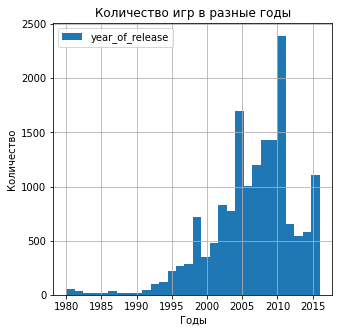

In [25]:
# Построим график для всей выборки данных
# По значениям года выпуска и методом проб установим рамки с 1980 по 2016
    
data.plot(y = 'year_of_release', kind = 'hist', bins = 30, range = (1980,2016), grid=True, figsize = (5,5));
plt.title('Количество игр в разные годы')
plt.xlabel('Годы')
plt.ylabel('Количество')
plt.show()

**С 1980 индустрия только зарождалсь и к 1993 начала резкий путь наверх**

**Можно сказать что наиболее важный путь - это с 1993 и до конца выборки - время рождения и становления феномена игр на консолях**

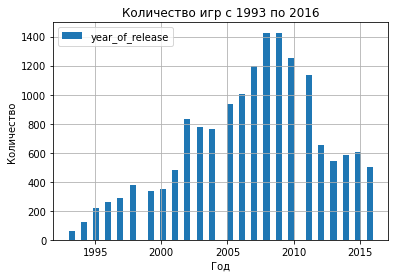

In [26]:
# Построим график для наиболее обширного пути
# По значениям года выпуска  установим рамки с 1933 по 2016

data.plot(y = 'year_of_release', kind = 'hist', bins = 50, range = (1993,2016), grid=True);
plt.title('Количество игр с 1993 по 2016')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()

**На данном графике виден уверенный рост до 2008 года и падение, потом вновь рост к 2015. Можно дать промежуточную оценку, что финансовый кризис 2008 года ударил по индустрии игр**

### Продажи по платформам

**Посмотрим какие платформы продаются чаще найдем топ 10**

In [27]:
top_platform_sales = data['platform'].value_counts().head(10) # топ 10 платформ
top_platform_sales_max = data.query(
    'platform in (@top_platform_sales.index)').pivot_table(values='all_sales', index='platform', aggfunc = 'sum')
# группируем из топа 10 платформ
top_platform = top_platform_sales_max.sort_values('all_sales', ascending=False) # группируем по возрастанию
top_platform_10 = top_platform.reset_index() # добавим нумерацию


In [28]:
top_platform_10 # выводим

,platform,all_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PSP,294.05
8,PC,259.52
9,XB,257.74


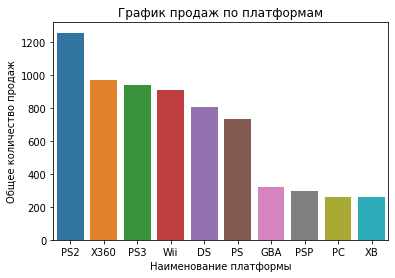

In [29]:
sns.barplot(data=top_platform_10, x="platform", y="all_sales"); # визуализируем
plt.title('График продаж по платформам')
plt.ylabel('Общее количество продаж')
plt.xlabel('Наименование платформы')
plt.show()

In [30]:
list(top_platform_10['platform'])

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PSP', 'PC', 'XB']

*Чаще продаются платформы на графике выше - самые продаваемые платформы это 'PS2', 'X360', 'PS3'*

**Составим топ распределения по годам**

In [31]:
# группируем из топа 10 платформ

top_year_sales= data['year_of_release'].value_counts().head(10) # топ 10 платформ
top_platform_sales_max = data.query(
    'year_of_release in (@top_year_sales.index)').pivot_table(values='all_sales', index='year_of_release', aggfunc = 'sum')
top_year = top_platform_sales_max.sort_values('all_sales', ascending=False) # группируем по возрастанию


In [32]:
top_year_10 = top_year.reset_index()

In [33]:
top_year_10

,year_of_release,all_sales
0,2008,671.50
1,2009,658.82
2,2007,604.75
3,2010,590.13
4,2006,517.71
5,2011,507.58
6,2005,457.82
7,2004,418.68
8,2002,394.97
9,2003,357.54


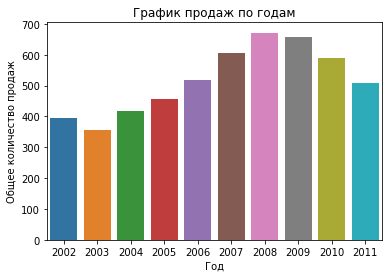

In [34]:
sns.barplot(data=top_year_10, x="year_of_release", y="all_sales");
plt.title('График продаж по годам')
plt.ylabel('Общее количество продаж')
plt.xlabel('Год')
plt.show()

In [35]:
list(top_year_10['year_of_release'])

[2008, 2009, 2007, 2010, 2006, 2011, 2005, 2004, 2002, 2003]

*Года с максимуми продаж - это 2008 2009 2007*

*Четко виден рост к 2008 и падение после него*

**Срок жизни платформ**

In [36]:
top_year_10['year_of_release'].count() # Прмерный ориентир жизни платформы

10

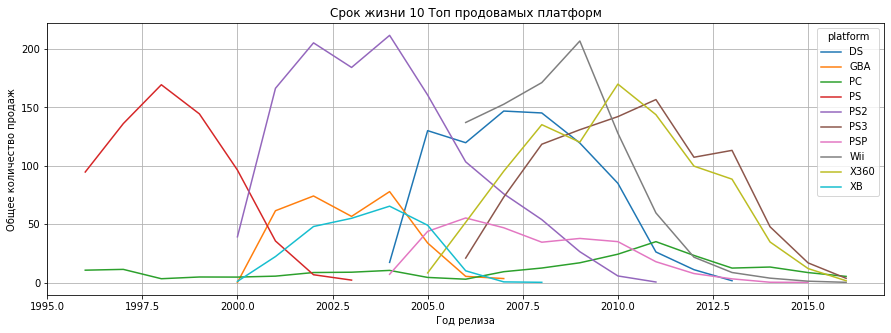

In [37]:
# Прмерный ориентир жизни платформы можно посмотреть наглядно
# Возьмем топ платформ и выведем их жиненный путь по продажам на график

data_life = data.query("platform == ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PSP', 'PC', 'XB'] and year_of_release > 1995")
data_life.pivot_table(index='year_of_release', columns = 'platform', values='all_sales', aggfunc='sum').plot(
    grid=True, figsize=(15, 5));
plt.title('Срок жизни 10 Топ продовамых платформ')
plt.xlabel('Год релиза')
plt.ylabel('Общее количество продаж')
plt.show()

*Платформа живет 10 лет, чаще всего*

### Актуальный период для выборки

**Возьмем самые продоваемые платформы в самые продоваемые года**

<div class="alert alert-info">
<b> Выберем актуальный период из логики данных, которые мы имеем. Раз нам нужен прогноз на 2017 и желание увидеть еще актуальные платформы достаточно велико, данные мы возьмем за 2015 и 2016 год.</b> 
</div>

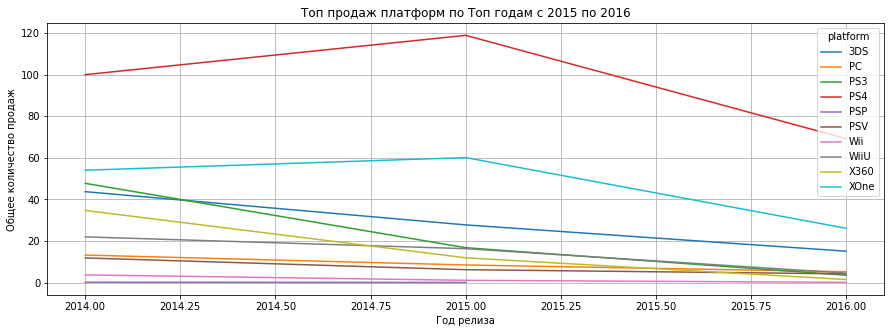

In [38]:
# Посмотрим все платформы, на период оставим с 2015 по 2016

period_actyal = data.query('year_of_release >= 2014') 

period_actyal.pivot_table(index='year_of_release', columns = 'platform', values='all_sales', aggfunc='sum').plot(
    grid=True, figsize=(15, 5));
plt.title('Топ продаж платформ по Топ годам с 2015 по 2016')
plt.xlabel('Год релиза')
plt.ylabel('Общее количество продаж')
plt.show()

<div class="alert alert-info">
<b> Найдем самые продаваемые платформы из новой выборки, где года только 2015 и 2016</b> 
</div>

In [39]:
top_pl_actyal_sales = period_actyal['platform'].value_counts().head(10) # топ 10 платформ
top_pl_actyal_max = period_actyal.query(
    'platform in (@top_pl_actyal_sales.index)').pivot_table(values='all_sales', index='platform', aggfunc = 'sum')
top_plat_actyal = top_pl_actyal_max.sort_values('all_sales', ascending=False) # группируем по возрастанию
top_plat_actyal_sal = top_plat_actyal.reset_index()

In [40]:
top_plat_actyal_sal

,platform,all_sales
0,PS4,288.15
1,XOne,140.36
2,3DS,86.68
3,PS3,68.18
4,X360,48.22
5,WiiU,42.98
6,PC,27.05
7,PSV,22.40
8,Wii,5.07
9,PSP,0.36


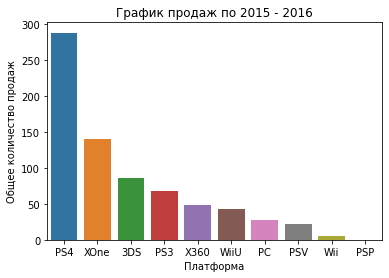

In [41]:
sns.barplot(data=top_plat_actyal_sal, x="platform", y="all_sales");
plt.title('График продаж по 2015 - 2016')
plt.ylabel('Общее количество продаж')
plt.xlabel('Платформа')
plt.show()

<div class="alert alert-info">
<b> Видно 3 платформы у которых больше всего продаж, у остальных результаты скромнее посмотрим ближе на расределения</b> 
</div>

In [42]:
list(top_plat_actyal_sal['platform'])

['PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU', 'PC', 'PSV', 'Wii', 'PSP']

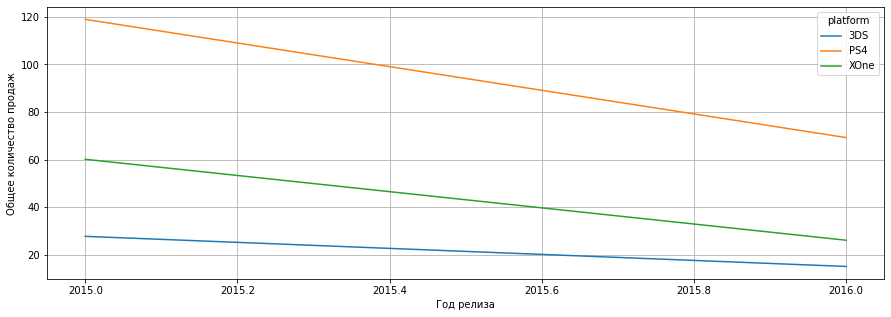

In [43]:
PS3_data = period_actyal.query("platform == ['PS4', 'XOne', '3DS'] and year_of_release > 2014")
PS3_data.pivot_table(index='year_of_release', columns = 'platform', values='all_sales', aggfunc='sum').plot(
    grid=True, figsize=(15, 5));
plt.xlabel('Год релиза')
plt.ylabel('Общее количество продаж')
plt.show()

<div class="alert alert-info">
<b> '3DS','PS4'и 'XOne' уверенно идут вниз - можно предположить что и в дальнейшем продажи будут падать
</div>

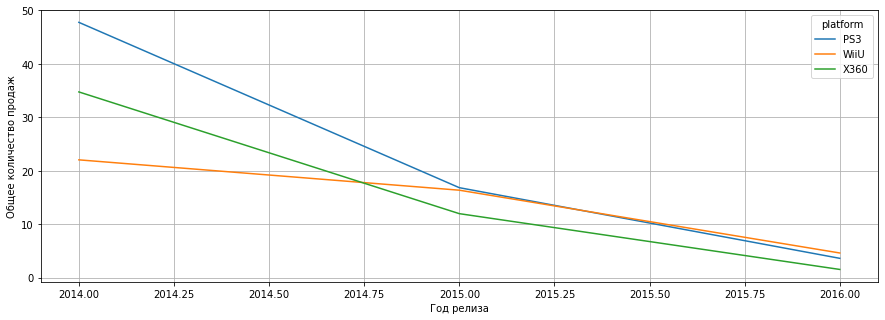

In [44]:
PS3_data = period_actyal.query("platform == ['PS3', 'X360', 'WiiU'] and year_of_release > 2013")
PS3_data.pivot_table(index='year_of_release', columns = 'platform', values='all_sales', aggfunc='sum').plot(
    grid=True, figsize=(15, 5));
plt.xlabel('Год релиза')
plt.ylabel('Общее количество продаж')
plt.show()

<div class="alert alert-info">
<b> 'PS3', 'X360' равномерно резко снижались с 14ого по 15ый год и более равномерно продолжили падение в след году, "WiiU" уверенно падает в своем темпе
</div>

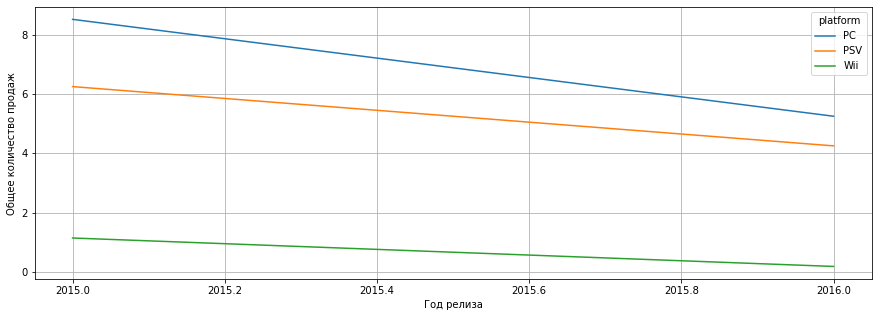

In [45]:
PS3_data = period_actyal.query("platform == ['PC', 'PSV', 'Wii'] and year_of_release > 2014")
PS3_data.pivot_table(index='year_of_release', columns = 'platform', values='all_sales', aggfunc='sum').plot(
    grid=True, figsize=(15, 5));
plt.xlabel('Год релиза')
plt.ylabel('Общее количество продаж')
plt.show()

<div class="alert alert-info">
<b> Тут у всех динамика равномерномерного падения</b> 
</div>

<div class="alert alert-info">
<b> Актуальный период определили по новой взяли с 2014 года по 2016, топ продаж построен - в топе 'X360', 'PS3', 'Wii', динамика определена в - тенденция на снижение продаж не считая 'PSV' 'PC','PSP' и 'Wii'  </b> 
</div>

### График с усами

<div class="alert alert-info">
<b> Добавим в график параметр пplt.ylim(0, 2) что бы видеть нижнюю часть и разабьем выборку на 2 части что бы отчетливо видеть названия </b> 
</div>

In [46]:
period_actyal['platform'].unique() # Выведем все приставки

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

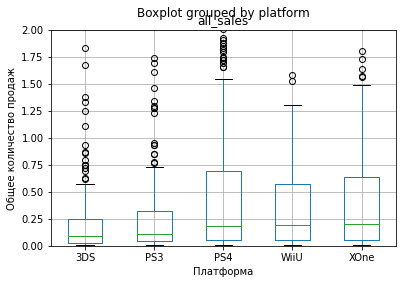

In [47]:
# Строим диаграмму размаха по первой половине на нижний ус

first_part_data = period_actyal.query("platform == ['PS4', '3DS', 'XOne', 'WiiU', 'PS3']")
first_part_data.boxplot(column='all_sales', by='platform')
plt.ylim(0, 2)
plt.xlabel('Платформа')
plt.ylabel('Общее количество продаж')
plt.show()



<div class="alert alert-info">
<b> У всех платформ медина в примерно одном диапозоне, больша я часть значений - это то что лежит в "прямоугольнике" - у PS4 и XOne  примерно на уровне 0.73 на третьем месте WiiU  и замыкает 3DS и PS3
</div>

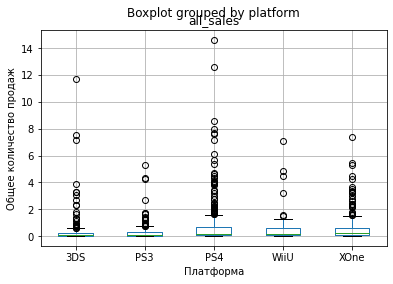

In [48]:
# Строим диаграмму размаха по первой половине на верхний ус

first_part_data = period_actyal.query("platform == ['PS4', '3DS', 'XOne', 'WiiU', 'PS3']")
first_part_data.boxplot(column='all_sales', by='platform')
plt.xlabel('Платформа')
plt.ylabel('Общее количество продаж')
plt.show()

<div class="alert alert-info">
<b> Больше всего выбросов у PS4 и 3DS на уровне 14 и 12 возможно это сходится с релизами супер популярных игр на этих платформах
</div>

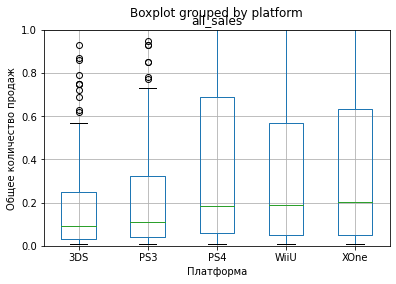

In [49]:
# Строим диаграмму размаха по первой половине на нижний ус

first_part_data = period_actyal.query("platform == ['PS4', '3DS', 'XOne', 'WiiU', 'PS3']")
first_part_data.boxplot(column='all_sales', by='platform')
plt.ylim(0, 1)
plt.xlabel('Платформа')
plt.ylabel('Общее количество продаж')
plt.show()

In [50]:
first_part_data['all_sales'].describe()

count    1108.000000
mean        0.565298
std         1.255254
min         0.010000
25%         0.040000
50%         0.130000
75%         0.480000
max        14.630000
Name: all_sales, dtype: float64

<div class="alert alert-info">
<b> Нижние «усы» упираеются в 0,01 минимальное значение. Верхние заканчиваются около 0.48 . Это ориентировочная граница нормального размаха. Всё, что лежит за ней, считается выбросом. Более высокие значения рисуются отдельными точками: таких выбросов много и доходят аж до 14.6 у PS4. </b> 
</div>

### Влияние на продажи отзывов на примере PS4 

**Диаграмма рассеяния - посмотрим на примере PS4 и остальных топ 5 платформ**

<div class="alert alert-info">
<b> Исследование берем из выборки вктуального периода </b> 
</div>

In [51]:
first_part_data = period_actyal.query("platform == ['PS4', '3DS', 'XOne', 'WiiU', 'PS3']")

Коэффициент корелляции PS4 -0.040131589472697356


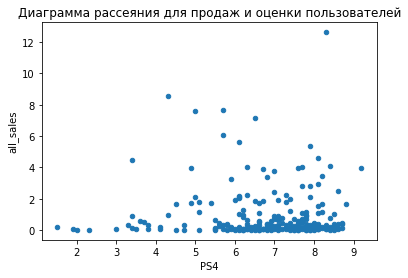

Коэффициент корелляции 3DS 0.2151932718527028


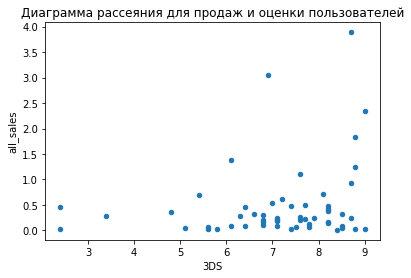

Коэффициент корелляции XOne -0.0703839280647581


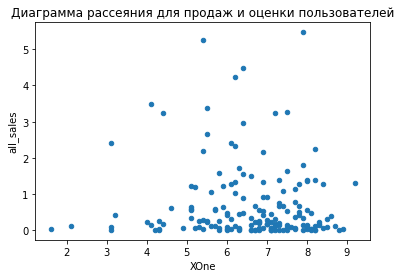

Коэффициент корелляции WiiU 0.40792645792170773


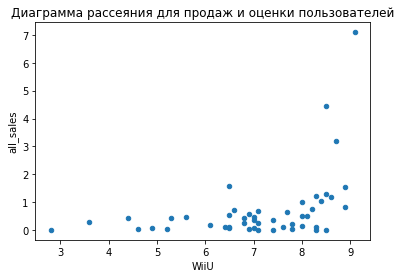

Коэффициент корелляции PS3 -0.16676141347662118


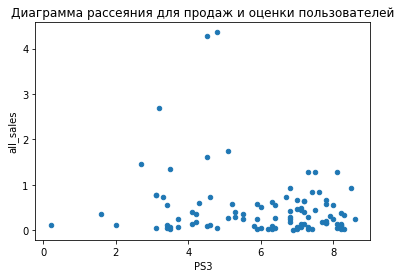

In [52]:
unique_data = 0 

for i in first_part_data['platform'].unique():
    cor_top5 = first_part_data.query("platform == @i")
    print('Коэффициент корелляции', i, cor_top5['user_score'].corr(first_part_data['all_sales']))
    cor_top5.plot(x='user_score', y='all_sales', kind='scatter')
    plt.title('Диаграмма рассеяния для продаж и оценки пользователей')
    plt.xlabel(i)
    plt.show()

Коэффициент корелляции PS4 0.40266141068104083


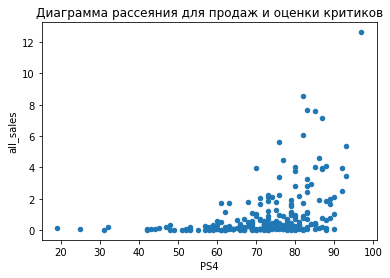

Коэффициент корелляции 3DS 0.314117492869051


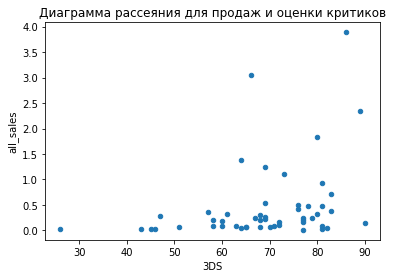

Коэффициент корелляции XOne 0.42867694370333226


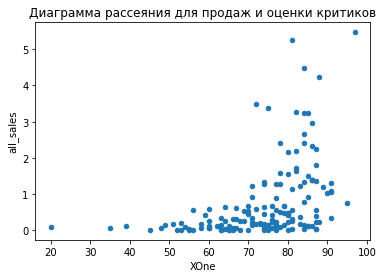

Коэффициент корелляции WiiU 0.370201412480884


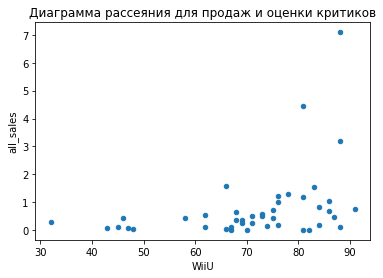

Коэффициент корелляции PS3 0.44657460493190704


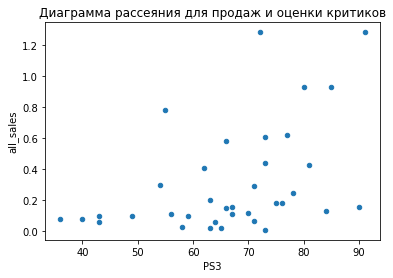

In [53]:
unique_data = 0 

for i in first_part_data['platform'].unique():
    cor_top5 = first_part_data.query("platform == @i")
    print('Коэффициент корелляции', i, cor_top5['critic_score'].corr(first_part_data['all_sales']))
    cor_top5.plot(x='critic_score', y='all_sales', kind='scatter')
    plt.title('Диаграмма рассеяния для продаж и оценки критиков')
    plt.xlabel(i)
    plt.show()

<div class="alert alert-info">
<b> На популяронйо платформе Коэффициент корелляции PS4 -0.04 от оценок пользователей и 0.40 от оценок критиков, что говорит о большем влиянии критиков на продажи</b> 
</div>

### Продажи игр на других платформах

In [54]:
first_part_data = period_actyal.query("platform == ['XOne']")

XOne_cor = first_part_data[['critic_score','user_score', 'all_sales']]
XOne_cor.corr()

,critic_score,user_score,all_sales
critic_score,1.000000,0.440977,0.428677
user_score,0.440977,1.000000,-0.070384
all_sales,0.428677,-0.070384,1.000000


In [55]:
first_part_data = period_actyal.query("platform == ['3DS']")

а3DS_cor = first_part_data[['critic_score','user_score', 'all_sales']]
а3DS_cor.corr()


,critic_score,user_score,all_sales
critic_score,1.000000,0.862485,0.314117
user_score,0.862485,1.000000,0.215193
all_sales,0.314117,0.215193,1.000000


In [56]:
first_part_data = period_actyal.query("platform == ['PS3']")

PS3_cor = first_part_data[['critic_score','user_score', 'all_sales']]
PS3_cor.corr()

,critic_score,user_score,all_sales
critic_score,1.000000,0.693445,0.446575
user_score,0.693445,1.000000,-0.166761
all_sales,0.446575,-0.166761,1.000000


<div class="alert alert-info">
<b> В актуальном периоде оценнки критиков влияют на продажи сильнее оценок пользователей по всем изученым платформам
    
    XOne критики 0.428677	Пользователи -0.070384
    3DS критики 0.314117	Пользователи 0.215193
    PS3 критики 0.446575	Пользователи -0.166761
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v2 <a class="tocSkip"></h2>
   
<b>На доработку🤔:</b> Справедлив тот же вопрос, что и выше. Плюс давай рассмотрим корреляции для остальных платформ, хорошо?

<div class="alert alert-info">
<b> Переделел график с усами и добавил кореляцию по платформам</b> 
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v3 <a class="tocSkip"></h2>
   
<b>На доработку🤔:</b> Еще раз обозначу, что в этом разделе у нас не фищки с усами, и адаграммы рассеивания. Давай еще построим диаграммы рассеивания для всех исследованных выше платформ. Получается, что для каждой платформы будет 2 диаграаммы: user_score - all_sales и critic_score - all_sales

<div class="alert alert-info">
<b> Построил диаграммы рассеевания для пользователей и критиков от продаж и добавил коэффициенты корреляции</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v4 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Ага, молодец!

### Распределение игр по жанрам

In [57]:
len(period_actyal['genre'].unique()) # Всего жанров

12

In [58]:
# Строим похожую конструкцию для жанров

top_genre_sales= period_actyal['genre'].value_counts().head(12)
top_pgenre_sales_max = data.query(
    'genre in (@top_genre_sales.index)').pivot_table(values='all_sales', index='genre', aggfunc = 'sum')
top_genre = top_pgenre_sales_max.sort_values('all_sales', ascending=False)

In [59]:
top_genre_12 = top_genre.reset_index()
top_genre_12

,genre,all_sales
0,Action,1744.17
1,Sports,1331.27
2,Shooter,1052.45
3,Role-Playing,934.56
4,Platform,827.77
5,Misc,802.51
6,Racing,728.67
7,Fighting,447.53
8,Simulation,389.97
9,Puzzle,242.57


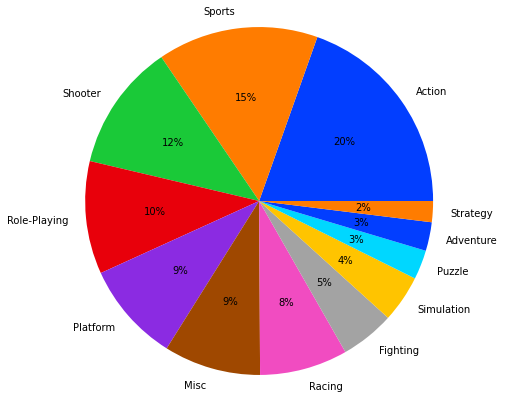

In [60]:
palette_color = seaborn.color_palette('bright')
plt.pie(data = top_genre_12, x = 'all_sales', labels='genre', colors=palette_color, autopct='%.0f%%', radius =2)
plt.show()

*Половина всех жанров составляют 3 наиболее продаваемые акшены спорт и музыка замыкает список стратегии*

<div style="border:solid blue 2px; padding: 20px">
ВЫВОД: Самый важный период это период расцева и кратковременного упадка игр с 1993 по сейчас на нем можно увидеть и рост интереса к данной отрасли и влияния внешних факторов. В среднем в течении 10 лет рождаются и умирают новые платформы в борьбе с Родителями отрасли плейстейшеном и пк. Оценки влияют, но не так сильно как скорее всего вляиют прочий факторы, но сбрасывать их со счетов нельзя так как они всеравно имееют влияние. 3 наиболее популярных жанра составляют больше половины всех продаж.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> А давай медианы здесь еще посмотрим?

## Портрет пользователя каждого региона


### Топ 5 платформ

**Северная Амерканские топ Платформ**

In [61]:
top_na_sales = period_actyal['platform'].value_counts().head(5) # топ 10 платформ
top_na_sales_platform = period_actyal.query(
    'platform in (@top_na_sales.index)').pivot_table(values='na_sales', index='platform', aggfunc = 'sum')
top_na = top_na_sales_platform.sort_values('na_sales', ascending=False)
top_na_5 = top_na.reset_index()
top_na_5

,platform,na_sales
0,PS4,98.61
1,XOne,81.27
2,3DS,22.64
3,PS3,22.05
4,PSV,2.52


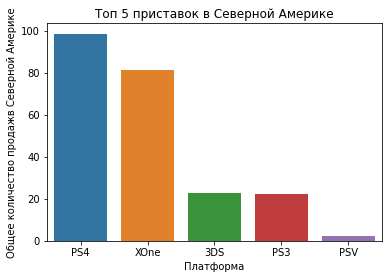

In [62]:
sns.barplot(data=top_na_5, x="platform", y="na_sales");
plt.title('Топ 5 приставок в Северной Америке')
plt.ylabel('Общее количество продажв Северной Америке')
plt.xlabel('Платформа')
plt.show()

**ПС4 созданная в 2013 (в инете посмотрел) вышла на свой пик проддаж к 2014-2016 годам и пойдет на спад дальше в правилах игры на этом рынке который мы заметилии ранее**

**Европейские топ Платформ**

In [63]:
top_eu_sales = period_actyal['platform'].value_counts().head(5) # топ 10 платформ
top_eu_sales_platform = period_actyal.query(
    'platform in (@top_eu_sales.index)').pivot_table(values='eu_sales', index='platform', aggfunc = 'sum')
top_eu = top_eu_sales_platform.sort_values('eu_sales', ascending=False)
top_eu_5 = top_eu.reset_index()
top_eu_5

,platform,eu_sales
0,PS4,130.04
1,XOne,46.25
2,PS3,25.54
3,3DS,16.12
4,PSV,3.53


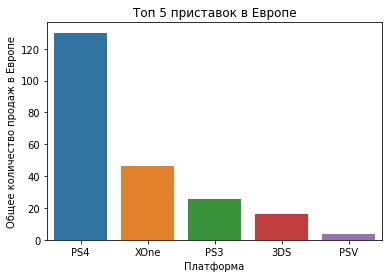

In [64]:
sns.barplot(data=top_eu_5, x="platform", y="eu_sales");
plt.title('Топ 5 приставок в Европе')
plt.ylabel('Общее количество продаж в Европе')
plt.xlabel('Платформа')
plt.show()

**В Европе топ остается тем же только с меньшим количеством и большим отставанием XONE, что говорит о неокой солидарности западного мира**

**Японски топ Платформ**

In [65]:
top_jp_sales = period_actyal['platform'].value_counts().head(5) # топ 10 платформ
top_jp_sales_platform = period_actyal.query(
    'platform in (@top_jp_sales.index)').pivot_table(values='jp_sales', index='platform', aggfunc = 'sum')
top_jp = top_jp_sales_platform.sort_values('jp_sales', ascending=False)
top_jp_5 = top_jp.reset_index()
top_jp_5

,platform,jp_sales
0,3DS,44.24
1,PS4,15.02
2,PSV,14.54
3,PS3,11.22
4,XOne,0.32


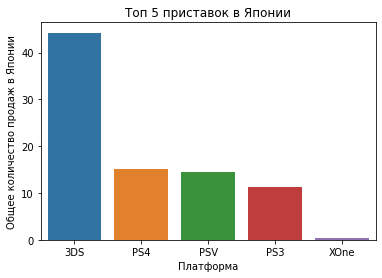

In [66]:
sns.barplot(data=top_jp_5, x="platform", y="jp_sales");
plt.title('Топ 5 приставок в Японии')
plt.ylabel('Общее количество продаж в Японии')
plt.xlabel('Платформа')
plt.show()

**В Японии нинтендо 3DS вырывается уверено в лидеры, возможно там ее и придумали для локального рынка, визуально уступающего в количестве продаж**

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Верно!

### Топ 5 Жанров

**Северная Америка и жанры Игр**

In [67]:
top_genre_na_sales= period_actyal['genre'].value_counts().head(5)
top_pgenre_na_sales= period_actyal.query(
    'genre in (@top_genre_na_sales.index)').pivot_table(values='na_sales', index='genre', aggfunc = 'sum')
top_genre_na_sales = top_pgenre_na_sales.sort_values('na_sales', ascending=False)
top_na_sales = top_genre_na_sales.reset_index()
top_na_sales

,genre,na_sales
0,Shooter,79.02
1,Action,72.53
2,Sports,46.13
3,Role-Playing,33.47
4,Adventure,5.64


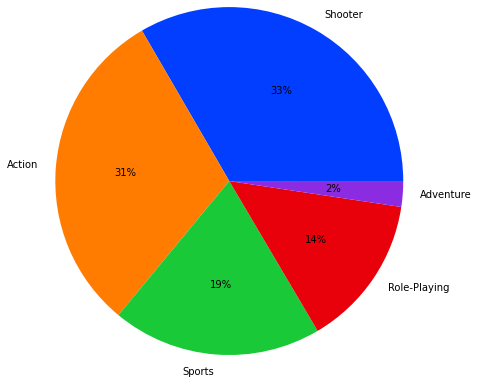

In [68]:
palette_color = seaborn.color_palette('bright')
plt.pie(data = top_na_sales, x = 'na_sales', labels='genre', colors=palette_color, autopct='%.0f%%', radius =2)
plt.show()

**В америке любовь к оружию выражается не только возможностью его ношения но и в компьютерных играх**

**Европа**

In [69]:
top_genre_eu_sales= period_actyal['genre'].value_counts().head(5)
top_pgenre_eu_sales= period_actyal.query(
    'genre in (@top_genre_eu_sales.index)').pivot_table(values='eu_sales', index='genre', aggfunc = 'sum')
top_genre_eu_sales = top_pgenre_eu_sales.sort_values('eu_sales', ascending=False)
top_eu_sales = top_genre_eu_sales.reset_index()
top_eu_sales

,genre,eu_sales
0,Action,74.68
1,Shooter,65.52
2,Sports,45.73
3,Role-Playing,28.17
4,Adventure,6.49


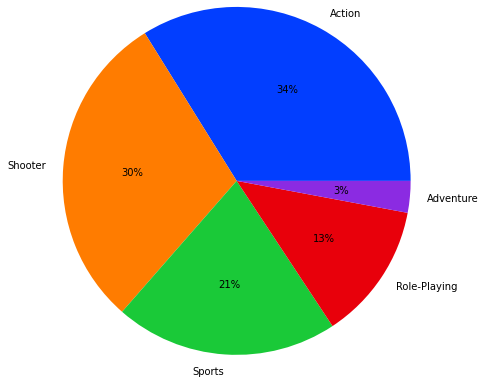

In [70]:
palette_color = seaborn.color_palette('bright')
plt.pie(data = top_eu_sales, x = 'eu_sales', labels='genre', colors=palette_color, autopct='%.0f%%', radius =2)
plt.show()

**Европейский потребитель оказался любетелм экшен жанров, но и влияние шутингов так же велико**

**Япония**

In [71]:
top_genre_jp_sales= period_actyal['genre'].value_counts().head(5)
top_pgenre_jp_sales= period_actyal.query(
    'genre in (@top_genre_jp_sales.index)').pivot_table(values='jp_sales', index='genre', aggfunc = 'sum')
top_genre_jp_sales = top_pgenre_jp_sales.sort_values('jp_sales', ascending=False)
top_jp_sales = top_genre_jp_sales.reset_index()
top_jp_sales

,genre,jp_sales
0,Role-Playing,31.16
1,Action,29.58
2,Shooter,4.87
3,Adventure,3.60
4,Sports,3.26


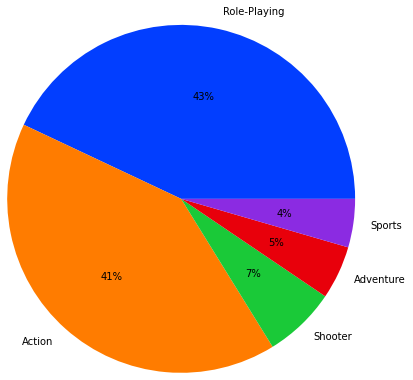

In [72]:
palette_color = seaborn.color_palette('bright')
plt.pie(data = top_jp_sales, x = 'jp_sales', labels='genre', colors=palette_color, autopct='%.0f%%', radius =2)
plt.show()

**В Японии же распределение по жанрам совершенно иное и на первое место выходит Ролевые игры а экшен уходит на 2ое сето**

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Правильно

### Влияние рейтинга ESRB на продажи

In [73]:
list(period_actyal['rating'].unique())

[nan, 'M', 'E', 'T', 'E10+']

In [74]:
# Группируем рейтинг в таблицу с продажами по регионам, возьмем медианные значения

ESRB_rating = period_actyal.pivot_table(index = 'rating', values = ['na_sales','eu_sales','jp_sales'], aggfunc = 'sum')
ESRB_rating

,eu_sales,jp_sales,na_sales
rating,,,
E,58.06,8.94,50.74
E10+,26.16,4.46,33.23
M,93.44,8.01,96.42
T,34.07,14.78,38.95


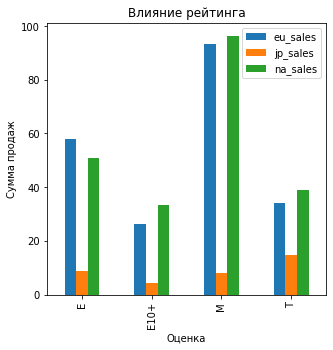

In [75]:
ESRB_rating.plot(kind = 'bar', figsize=(5,5));
plt.title('Влияние рейтинга')
plt.ylabel('Сумма продаж')
plt.xlabel('Оценка')
plt.show()

**Из таблицы и графика явно видно что в играх категории Е больший показатель у Европы в остальных параметрах америка обгоняет**

<div style="border:solid blue 2px; padding: 20px">
ВЫВОД: регионы Европы и Северной Америке в целом Монотонны не считая разница в рейтенге шутинга, Японский же рынок сильно отличается как в Жанрах так и в Платформах и допустимости рейтинговых ограничений

<div class="alert alert-info">
<b> Период расчетов показателей заменен</b> 
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  Исправим актуальный период и вернемся к проверке этого раздела
    

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Хорошо! Еще бы хаглушку ввести в ретйинги)

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  Давай все же гипотезы сформулируем?

<div class="alert alert-info">
<b> Формулировка нулевой и альтернативной гипотезы -
H0: рейтинги одинаковые
H1: рейтинги разные</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Гипотезы сформулирвоаны верно

In [76]:
period_actyal = period_actyal.dropna(subset = ['user_score']) # удаляем пропуски так как с ними не работает дальнейшие пвчисления
list(period_actyal['platform'].unique())

['PS4', 'WiiU', 'XOne', 'PS3', 'X360', '3DS', 'PC', 'Wii', 'PSV']

In [77]:

XOne_new = period_actyal.query("platform == 'XOne' & user_score >0")['user_score']
PC_new = period_actyal.query("platform == 'PC' & user_score >0")['user_score']

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    XOne_new, 
    PC_new )

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


In [78]:
print(XOne_new.mean())
print(PC_new.mean())

6.594545454545456
6.298360655737705


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  Так все же XOne или Х360?

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Исправлено!

### Средние пользовательские рейтинги жанров Action и Sports  разные

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b> Опять же давай сформулируем гипотезы
    

<div class="alert alert-info">
<b> Формулировка нулевой и альтернативной гипотезы -
H0: рейтинги одинаковые
H1: рейтинги разные</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Гипотезы сформулирвоаны правильно)

In [79]:
period_actyal = data.dropna(subset = ['user_score']) # удаляем пропуски так как с ними не работает дальнейшие пвчисления
list(data['genre'].unique())

['Sports',
 'Platform',
 'Racing',
 'Role-Playing',
 'Puzzle',
 'Misc',
 'Shooter',
 'Simulation',
 'Action',
 'Fighting',
 'Adventure',
 'Strategy']

In [80]:

action_new= data[data['genre'] == 'Action']
action_new_user_score = action_new['user_score']

sport_new= data[data['genre'] == 'Sports']
sport_new_user_score = sport_new['user_score']

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    action_new_user_score, 
    sport_new_user_score)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: nan
Не получилось отвергнуть нулевую гипотезу


In [81]:
print(action_new_user_score.mean())
print(sport_new_user_score.mean())

7.054043715846995
6.96119673617407


<div style="border:solid blue 2px; padding: 20px">
ВЫВОД:
мы применили этот метод потому что выборочные средние нормально распределены.


Формулировка нулевой и альтернативной гипотезы -    
H0: рейтинги одинаковые    
H1: рейтинги разные
    

In [82]:
data['user_score'].describe()

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b> Ага, а вот и формулирование гипотез) Давай перенесем перед проверкой гипотез, а также перерабоатем этот раздел по новому актуальному периоду

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v2 <a class="tocSkip"></h2>
   
<b>На доработку🤔:</b> Давай еще оценки выведем средние, хорошо?

<div class="alert alert-info">
<b> Добавил среднее теории отвергнуты</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v3 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Хорошо
    

## Общий вывод

<div style="border:solid blue 2px; padding: 20px">
ВЫВОД: изучены данные и произведены небходимые преобразования, добавлен столбец суммарынх продаж по которму слделаны многие выводы в дальнейшем исследовании. Посчитано и визуально представлено количество игр и их жизненый цикл как по жанрам так и по платформам, исследованы корреляции с отзывами и продажами в заных регионах, рассмотрено влияние рейтинга в регионах и не приняты 2 поставленные гипотезы.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  Исправим ошибки выше и доработаем итоговый вывод

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v4 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Вывод не забудь доработать п омотвиам испралвений выше

<div style="border:solid Chocolate 2px; padding: 40px">
    
**Общий вывод по проекту ревьювера**:
 Александр, спасибо за  проект! Ты приложил много усилий, чтобы довести его до конца, проделана огромная работа, и это видно невооруженным глазом, ты большой молодец!
    
**Отмечу положительные моменты**:
    
    1. Все разложено по полочкам, всегда понятен ход твоих мыслей, приятно смотреть
    
    2. Отличные визуализации
    
    2. На разных шагах проекта ты предлагал очень интересные решения и методы для их реализации. Хорошая работа!
    
    
**На что стоит обратить внимание**:
    
    1. Актуальный период определен неверно, что повлекло ошибки в следующих разделах

    2. Боксплоты построены не совсем так, как нужно

    3. Не рассмотрены графики рассеивания для оценок пользователей

    4. Ошибки в проверке гипотез
    
    
**Удачи и жду твой проект на повторное ревью!**

<div style="border:solid Chocolate 2px; padding: 40px">
    
**Общий вывод по проекту ревьювера v2**:
 Александр, часть ошибок исправлена, но пока не все. Мы на верном пути, увидимся на следующей итерации. Ты молодец!

<div style="border:solid Chocolate 2px; padding: 40px">
    
**Общий вывод по проекту ревьювера v3**:
 Александр, хорошая работа на этой итерации, молодец, но не везде исправлены выводы и все еще есть ошибки в раьоте с исследованием завиисмости цены от ретйингов

<div style="border:solid Chocolate 2px; padding: 40px">
    
**Общий вывод по проекту ревьювера v4**:
 Александр, ошибки исправлены, проект принят, поздравляю тебя! Успешной учебы и еще увидимся в Практикуме!

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-и-общей-информации" data-toc-modified-id="Изучение-данных-и-общей-информации-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных и общей информации</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Заменим-названия-столбцов" data-toc-modified-id="Заменим-названия-столбцов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Заменим названия столбцов</a></span></li><li><span><a href="#Преобразуем-данные-в-нужные-типы-и-обработаем-пропуски" data-toc-modified-id="Преобразуем-данные-в-нужные-типы-и-обработаем-пропуски-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Преобразуем данные в нужные типы и обработаем пропуски</a></span></li><li><span><a href="#Посчитаем-суммарные-продажи-во-всех-регионах-и-создадим-для-них-отдельный-столбец" data-toc-modified-id="Посчитаем-суммарные-продажи-во-всех-регионах-и-создадим-для-них-отдельный-столбец-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Посчитаем суммарные продажи во всех регионах и создадим для них отдельный столбец</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Количество-игр-в-разные-годы" data-toc-modified-id="Количество-игр-в-разные-годы-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Количество игр в разные годы</a></span></li><li><span><a href="#Продажи-по-платформам" data-toc-modified-id="Продажи-по-платформам-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Продажи по платформам</a></span></li><li><span><a href="#Актуальный-период-для-выборки" data-toc-modified-id="Актуальный-период-для-выборки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Актуальный период для выборки</a></span></li><li><span><a href="#График-с-усами" data-toc-modified-id="График-с-усами-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>График с усами</a></span></li><li><span><a href="#Влияние-на-продажи-отзывов-на-примере-PS4" data-toc-modified-id="Влияние-на-продажи-отзывов-на-примере-PS4-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Влияние на продажи отзывов на примере PS4</a></span></li><li><span><a href="#Продажи-игр-на-других-платформах" data-toc-modified-id="Продажи-игр-на-других-платформах-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Продажи игр на других платформах</a></span></li><li><span><a href="#Распределение-игр-по-жанрам" data-toc-modified-id="Распределение-игр-по-жанрам-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Распределение игр по жанрам</a></span></li></ul></li><li><span><a href="#Портрет-пользователя-каждого-региона" data-toc-modified-id="Портрет-пользователя-каждого-региона-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Портрет пользователя каждого региона</a></span><ul class="toc-item"><li><span><a href="#Топ-5-платформ" data-toc-modified-id="Топ-5-платформ-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Топ 5 платформ</a></span></li><li><span><a href="#Топ-5-Жанров" data-toc-modified-id="Топ-5-Жанров-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Топ 5 Жанров</a></span></li><li><span><a href="#Влияние-рейтинга-ESRB-на-продажи" data-toc-modified-id="Влияние-рейтинга-ESRB-на-продажи-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Влияние рейтинга ESRB на продажи</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Средние-пользовательские-рейтинги-платформ-Xbox-One-и-PC-одинаковые" data-toc-modified-id="Средние-пользовательские-рейтинги-платформ-Xbox-One-и-PC-одинаковые-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Средние пользовательские рейтинги платформ Xbox One и PC одинаковые</a></span></li><li><span><a href="#Средние-пользовательские-рейтинги-жанров-Action-и-Sports--разные" data-toc-modified-id="Средние-пользовательские-рейтинги-жанров-Action-и-Sports--разные-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Средние пользовательские рейтинги жанров Action и Sports  разные</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

In [ ]:
<div style="border:solid Chocolate 2px; padding: 40px">

<b>Александр, привет!</b>

Меня зовут Евгений Головин, я буду ревьюером твоего проекта. Если ты не против, то предлагаю посмотрить наше общение на "ты" ;) Если удобнее на "вы", то нет проблем, только скажи об этом. 

В ходе работы я оставил тебе комментарии <font color='green'>зеленого</font>, <font color='gold'>желтого</font> и <font color='red'>красного</font> цветов. Сейчас объясню, что они значат:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Решение на этом шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Решение на этом шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 Решение на этом шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
Увидев мой комментарий, не удаляй его, он будет очень полезен в случае повторной проверки работы :)
    
<div class="alert alert-info">
<b>А свой помечай вот так, чтобы я его не потерял ;)</b> 
</div>
    
Увидев мой комментарий, не удаляй его, он будет очень полезен в случае повторной проверки работы :)
    
На мои комменатрии можно и нужно реагировать, только делать это стоит так, чтобы твои и мои комменты не смешались: выделяй свои цветами, сильно отличающимися от моих.
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также, и я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку!

<div class="alert alert-info">
<b>Привет, очень приятно</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Александр, привет еще раз! Взаимно, сейчас проведем повторное ревью

# Исследование закономерностей, определяющих успешность игры

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> А давай напишем небольшое введение? Какими данными обаладем? Что планиурем с нимим делать? 

## Изучение данных и общей информации

import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

data = pd.read_csv('/datasets/games.csv')

display(data.head()) # Выведем первые 5 строк 

data.info() # Выводим общую информацию

print(data.isna().sum()) # Смотрим количество пропусков

data.shape # Выведем размер 

data.describe() # Выведем статистические данные, которые дают представление о распределении значений

<div style="border:solid blue 2px; padding: 20px">
ВЫВОД: в полученном датасете 11 столбцов по 16715 значений имеются пропуски в полседних трех столбацх с рейтингом и в стольце с годами, наименование колонок не приведены к нижнему регистру, типы данных в годах и оценках пользователей логически не верны

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Отлично! Отметили и пропуски, и неправильные типы данных, и неправильный неминг столбцов. Молодец! Также можно здесь проверить наличие явных дублей и что-нибдуь сказать о распределениях данных

## Подготовка данных

### Заменим названия столбцов

list(data.columns) # Посмотрим названия колонок

for i in data: # Приведем все к нижнему регистру
    
    data = data.rename(columns={i : i.lower()})

data.head() # Проверим

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Привели к нижнему регистру, отлично!

### Преобразуем данные в нужные типы и обработаем пропуски

**Год выпуск должен быть целым числом, пропуски удалим**

data['year_of_release'] = data['year_of_release'].fillna(0) # Заменим пропуски нулями 

data['year_of_release'] = data['year_of_release'].astype(int) # Поменяем тип данных на целые числа

data['year_of_release'].unique() # Проверим

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Дата приведена к правильному типу данных)

**Оценка пользователей приведем к значения флоат и заменим tbd на nan**

data['user_score'].unique() # Посмотрим уникальные значения

data['user_score'].replace('tbd', 'nan', inplace=True) # Заменим tbd на nan

data['user_score'] = data['user_score'].astype("float") #.reset_index() # Поменяем тип данных

data['user_score'].unique() # Проверим

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Полностью поддерживаю работу выше!

**Удалим 2 значения пропущенных в наименованиях**

data[data['name'].isnull()] # Не повлияет на общую картину и упростит дальнейшую обработку

data = data.dropna(subset = ['name']).reset_index() # Удаляем

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Можно, но не забываем сбрасывать индексы

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Сбросили

**Посмотрим уникальные значения колонок с неполными данными**

data['rating'].unique()

data['critic_score'].unique()

*Данные в этих столбцах мы оставим как есть, что бы не менять общюю картину данных, так как удаление приведет к недопустиому сокращению исследовательских данных, замену на медианное ззначение тут не и меет логического смысла*

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Почему бы нам не ввести заглушку?

### Посчитаем суммарные продажи во всех регионах и создадим для них отдельный столбец

data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'] # Складываем


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Сумма продаж по столбцам посчитана верно)

data.head() # Проверяем

data.shape # Проверяем размер данных после преобразований

<div style="border:solid blue 2px; padding: 20px">
ВЫВОД: причесали датасет, что бы в дальнейшем исследовании не было ошибок преобрзования данных - типы данных приведены к логически верным, наименование столбцов к нижнему регистру для удобства, заменен артефакт tbd, добавлена колонка общих продаж

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Отлично поработали, подтверждаю!

## Исследовательский анализ данных

### Количество игр в разные годы

# Построим график для всей выборки данных
# По значениям года выпуска и методом проб установим рамки с 1980 по 2016
    
data.plot(y = 'year_of_release', kind = 'hist', bins = 30, range = (1980,2016), grid=True, figsize = (5,5));
plt.title('Количество игр в разные годы')
plt.xlabel('Годы')
plt.ylabel('Количество')
plt.show()

**С 1980 индустрия только зарождалсь и к 1993 начала резкий путь наверх**

**Можно сказать что наиболее важный путь - это с 1993 и до конца выборки - время рождения и становления феномена игр на консолях**

# Построим график для наиболее обширного пути
# По значениям года выпуска  установим рамки с 1933 по 2016

data.plot(y = 'year_of_release', kind = 'hist', bins = 50, range = (1993,2016), grid=True);
plt.title('Количество игр с 1993 по 2016')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()

**На данном графике виден уверенный рост до 2008 года и падение, потом вновь рост к 2015. Можно дать промежуточную оценку, что финансовый кризис 2008 года ударил по индустрии игр**

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Ага, отлично, соглсаен!

### Продажи по платформам

**Посмотрим какие платформы продаются чаще найдем топ 10**

top_platform_sales = data['platform'].value_counts().head(10) # топ 10 платформ
top_platform_sales_max = data.query(
    'platform in (@top_platform_sales.index)').pivot_table(values='all_sales', index='platform', aggfunc = 'sum')
# группируем из топа 10 платформ
top_platform = top_platform_sales_max.sort_values('all_sales', ascending=False) # группируем по возрастанию
top_platform_10 = top_platform.reset_index() # добавим нумерацию


top_platform_10 # выводим

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Топ платформ по продажам по всему периоду выведен верно

sns.barplot(data=top_platform_10, x="platform", y="all_sales"); # визуализируем
plt.title('График продаж по платформам')
plt.ylabel('Общее количество продаж')
plt.xlabel('Наименование платформы')
plt.show()

list(top_platform_10['platform'])

*Чаще продаются платформы на графике выше - самые продаваемые платформы это 'PS2', 'X360', 'PS3'*

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> И визуализацию отличная

**Составим топ распределения по годам**

# группируем из топа 10 платформ

top_year_sales= data['year_of_release'].value_counts().head(10) # топ 10 платформ
top_platform_sales_max = data.query(
    'year_of_release in (@top_year_sales.index)').pivot_table(values='all_sales', index='year_of_release', aggfunc = 'sum')
top_year = top_platform_sales_max.sort_values('all_sales', ascending=False) # группируем по возрастанию


top_year_10 = top_year.reset_index()

top_year_10

sns.barplot(data=top_year_10, x="year_of_release", y="all_sales");
plt.title('График продаж по годам')
plt.ylabel('Общее количество продаж')
plt.xlabel('Год')
plt.show()

list(top_year_10['year_of_release'])

*Года с максимуми продаж - это 2008 2009 2007*

*Четко виден рост к 2008 и падение после него*

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Так и есть!

**Срок жизни платформ**

top_year_10['year_of_release'].count() # Прмерный ориентир жизни платформы

# Прмерный ориентир жизни платформы можно посмотреть наглядно
# Возьмем топ платформ и выведем их жиненный путь по продажам на график

data_life = data.query("platform == ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PSP', 'PC', 'XB'] and year_of_release > 1995")
data_life.pivot_table(index='year_of_release', columns = 'platform', values='all_sales', aggfunc='sum').plot(
    grid=True, figsize=(15, 5));
plt.title('Срок жизни 10 Топ продовамых платформ')
plt.xlabel('Год релиза')
plt.ylabel('Общее количество продаж')
plt.show()

*Платформа живет 10 лет, чаще всего*

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Без сомнений поддерживаю!

### Актуальный период для выборки

**Возьмем самые продоваемые платформы в самые продоваемые года**

<div class="alert alert-info">
<b> Выберем актуальный период из логики данных, которые мы имеем. Раз нам нужен прогноз на 2017 и желание увидеть еще актуальные платформы достаточно велико, данные мы возьмем за 2015 и 2016 год.</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Правильно! Но мы беерм не только 15 и 16, а еще и 14 по коду, правильно?

# Посмотрим все платформы, на период оставим с 2015 по 2016

period_actyal = data.query('year_of_release >= 2014') 

period_actyal.pivot_table(index='year_of_release', columns = 'platform', values='all_sales', aggfunc='sum').plot(
    grid=True, figsize=(15, 5));
plt.title('Топ продаж платформ по Топ годам с 2015 по 2016')
plt.xlabel('Год релиза')
plt.ylabel('Общее количество продаж')
plt.show()

<div class="alert alert-info">
<b> Найдем самые продаваемые платформы из новой выборки, где года только 2015 и 2016</b> 
</div>

top_pl_actyal_sales = period_actyal['platform'].value_counts().head(10) # топ 10 платформ
top_pl_actyal_max = period_actyal.query(
    'platform in (@top_pl_actyal_sales.index)').pivot_table(values='all_sales', index='platform', aggfunc = 'sum')
top_plat_actyal = top_pl_actyal_max.sort_values('all_sales', ascending=False) # группируем по возрастанию
top_plat_actyal_sal = top_plat_actyal.reset_index()

top_plat_actyal_sal

sns.barplot(data=top_plat_actyal_sal, x="platform", y="all_sales");
plt.title('График продаж по 2015 - 2016')
plt.ylabel('Общее количество продаж')
plt.xlabel('Платформа')
plt.show()

<div class="alert alert-info">
<b> Видно 3 платформы у которых больше всего продаж, у остальных результаты скромнее посмотрим ближе на расределения</b> 
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v2 <a class="tocSkip"></h2>
   
<b>На доработку🤔:</b> Видимо я что-то не понимаю. Вижу на первому графике, что по продажам в каждому году PS4 была на первом месте, а выше уже X360 и PS3 выше. XOne была по продажам в каждому году на втором месте, но здесь вообще где-то сзади

<div class="alert alert-info">
<b> Поменял, забыл изменить датасет, теперь дейтсвительно ПС4 вышла в топ 1 как и на первом графике</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v3 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Ага, вижу, отлично! Молодец!

list(top_plat_actyal_sal['platform'])

PS3_data = period_actyal.query("platform == ['PS4', 'XOne', '3DS'] and year_of_release > 2014")
PS3_data.pivot_table(index='year_of_release', columns = 'platform', values='all_sales', aggfunc='sum').plot(
    grid=True, figsize=(15, 5));
plt.xlabel('Год релиза')
plt.ylabel('Общее количество продаж')
plt.show()

<div class="alert alert-info">
<b> '3DS','PS4'и 'XOne' уверенно идут вниз - можно предположить что и в дальнейшем продажи будут падать
</div>

PS3_data = period_actyal.query("platform == ['PS3', 'X360', 'WiiU'] and year_of_release > 2013")
PS3_data.pivot_table(index='year_of_release', columns = 'platform', values='all_sales', aggfunc='sum').plot(
    grid=True, figsize=(15, 5));
plt.xlabel('Год релиза')
plt.ylabel('Общее количество продаж')
plt.show()

<div class="alert alert-info">
<b> 'PS3', 'X360' равномерно резко снижались с 14ого по 15ый год и более равномерно продолжили падение в след году, "WiiU" уверенно падает в своем темпе
</div>

PS3_data = period_actyal.query("platform == ['PC', 'PSV', 'Wii'] and year_of_release > 2014")
PS3_data.pivot_table(index='year_of_release', columns = 'platform', values='all_sales', aggfunc='sum').plot(
    grid=True, figsize=(15, 5));
plt.xlabel('Год релиза')
plt.ylabel('Общее количество продаж')
plt.show()

<div class="alert alert-info">
<b> Тут у всех динамика равномерномерного падения</b> 
</div>

<div class="alert alert-info">
<b> Актуальный период определили по новой взяли с 2014 года по 2016, топ продаж построен - в топе 'X360', 'PS3', 'Wii', динамика определена в - тенденция на снижение продаж не считая 'PSV' 'PC','PSP' и 'Wii'  </b> 
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v2 <a class="tocSkip"></h2>
   
<b>На доработку🤔:</b> У нас в целом индустрия падает, не стоит об этом забыть. Но проблема не в этом, а вот что в нашем топе продаж по актуальному периоду откуда-то взялись PS и X360, хотя по первому графику четко видно, что лидеры должны быть другие

<div class="alert alert-info">
<b> Изменил в формуле формирование датасета на актуальный и дейчтвтельно поменялись платформы</b> 
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v3 <a class="tocSkip"></h2>
   
<b>На доработку🤔:</b> Только выводы еще подкорректируй, хорошо?

<div class="alert alert-info">
<b> Поменял выводы</b> 
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v4 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> По выводам - у нас же вся индустрия идет вниз, поэтому понятно, что дажеи на топовых платформах продажи пойдут вниз, но это не отменяет того, что они все еще будут приносить прибыль

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  Упс, кажется мы сбились с пути истинного. Для начала давай соблюдать последовательность: сначала актуальный период, затем топ продаж оп актуальному периоду, затем берем топовые по продажам платформы и сторим по ним боксплоты. По актуальному периоду - для целей прогнозирования продаж на следующий год даже в традиционных бизнесах редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно захватишь уже отжившие тренды. Но и слишком короткий период тоже брать не стоит.

### График с усами

<div class="alert alert-info">
<b> Добавим в график параметр пplt.ylim(0, 2) что бы видеть нижнюю часть и разабьем выборку на 2 части что бы отчетливо видеть названия </b> 
</div>

period_actyal['platform'].unique() # Выведем все приставки

# Строим диаграмму размаха по первой половине на нижний ус

first_part_data = period_actyal.query("platform == ['PS4', '3DS', 'XOne', 'WiiU', 'PS3']")
first_part_data.boxplot(column='all_sales', by='platform')
plt.ylim(0, 2)
plt.xlabel('Платформа')
plt.ylabel('Общее количество продаж')
plt.show()



<div class="alert alert-info">
<b> У всех платформ медина в примерно одном диапозоне, больша я часть значений - это то что лежит в "прямоугольнике" - у PS4 и XOne  примерно на уровне 0.73 на третьем месте WiiU  и замыкает 3DS и PS3
</div>

# Строим диаграмму размаха по первой половине на верхний ус

first_part_data = period_actyal.query("platform == ['PS4', '3DS', 'XOne', 'WiiU', 'PS3']")
first_part_data.boxplot(column='all_sales', by='platform')
plt.xlabel('Платформа')
plt.ylabel('Общее количество продаж')
plt.show()

<div class="alert alert-info">
<b> Больше всего выбросов у PS4 и 3DS на уровне 14 и 12 возможно это сходится с релизами супер популярных игр на этих платформах
</div>

# Строим диаграмму размаха по первой половине на нижний ус

first_part_data = period_actyal.query("platform == ['PS4', '3DS', 'XOne', 'WiiU', 'PS3']")
first_part_data.boxplot(column='all_sales', by='platform')
plt.ylim(0, 1)
plt.xlabel('Платформа')
plt.ylabel('Общее количество продаж')
plt.show()

first_part_data['all_sales'].describe()

<div class="alert alert-info">
<b> Нижние «усы» упираеются в 0,01 минимальное значение. Верхние заканчиваются около 0.48 . Это ориентировочная граница нормального размаха. Всё, что лежит за ней, считается выбросом. Более высокие значения рисуются отдельными точками: таких выбросов много и доходят аж до 14.6 у PS4. </b> 
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b> К сожалению, на этом графике видны только выбросы, и совсем не видны медиана и 75% квантиль. Для более обоснованных выводов нужно сделать дополнительный график, где будет отображена только нижняя часть boxplot-ов. Этого можно добиться, например, задав параметр ylim.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v2 <a class="tocSkip"></h2>
   
<b>На доработку🤔:</b> К сожалению все еще не видно медиан :( Предлагаю изменить тактику - давай исследовать здесь только топ-5 перспеткивных платформ, только в актуальном периоде + сделаем размер графика побольше. 

<div class="alert alert-info">
<b> Изменил на топ 5 по актуальному периоду и приблизил графики</b> 
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v3 <a class="tocSkip"></h2>
   
<b>На доработку🤔:</b> И выводы исправить не забудь)

<div class="alert alert-info">
<b> Поменял выводы</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v4 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Ага, хорошо)

### Влияние на продажи отзывов на примере PS4 

**Диаграмма рассеяния - посмотрим на примере PS4 и остальных топ 5 платформ**

<div class="alert alert-info">
<b> Исследование берем из выборки вктуального периода </b> 
</div>

first_part_data = period_actyal.query("platform == ['PS4', '3DS', 'XOne', 'WiiU', 'PS3']")

unique_data = 0 

for i in first_part_data['platform'].unique():
    cor_top5 = first_part_data.query("platform == @i")
    print('Коэффициент корелляции', i, cor_top5['user_score'].corr(first_part_data['all_sales']))
    cor_top5.plot(x='user_score', y='all_sales', kind='scatter')
    plt.title('Диаграмма рассеяния для продаж и оценки пользователей')
    plt.xlabel(i)
    plt.show()

unique_data = 0 

for i in first_part_data['platform'].unique():
    cor_top5 = first_part_data.query("platform == @i")
    print('Коэффициент корелляции', i, cor_top5['critic_score'].corr(first_part_data['all_sales']))
    cor_top5.plot(x='critic_score', y='all_sales', kind='scatter')
    plt.title('Диаграмма рассеяния для продаж и оценки критиков')
    plt.xlabel(i)
    plt.show()

<div class="alert alert-info">
<b> На популяронйо платформе Коэффициент корелляции PS4 -0.04 от оценок пользователей и 0.40 от оценок критиков, что говорит о большем влиянии критиков на продажи</b> 
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v2 <a class="tocSkip"></h2>
   
<b>На доработку🤔:</b> А мы этот график строим в оформате отызвы критиков - отызывы пользователей или отызвы критиков - цена и отызыв пользователей - цена?

<div class="alert alert-info">
<b> Поменял график с усами</b> 
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v3 <a class="tocSkip"></h2>
   
<b>На доработку🤔:</b> Но у нас в этом раздеел не ящик с усами, у нас диаграмма рассеивания. У тебя она построена в формате зависимость оценок критиков от оценок пользвоателей. Об этом мне говорит навзание осей - по x "user_score", а по y "critic_score". А должно быть 2 графика: завиисмость цены от оценок критиков + зависимость цены от оценок пользователей

<div class="alert alert-info">
<b> Построил графики как зависимость оценок пользователей от продаж и оценок критиков от продаж
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v4 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Ага, молодец!

### Продажи игр на других платформах

first_part_data = period_actyal.query("platform == ['XOne']")

XOne_cor = first_part_data[['critic_score','user_score', 'all_sales']]
XOne_cor.corr()

first_part_data = period_actyal.query("platform == ['3DS']")

а3DS_cor = first_part_data[['critic_score','user_score', 'all_sales']]
а3DS_cor.corr()


first_part_data = period_actyal.query("platform == ['PS3']")

PS3_cor = first_part_data[['critic_score','user_score', 'all_sales']]
PS3_cor.corr()

<div class="alert alert-info">
<b> В актуальном периоде оценнки критиков влияют на продажи сильнее оценок пользователей по всем изученым платформам
    
    XOne критики 0.428677	Пользователи -0.070384
    3DS критики 0.314117	Пользователи 0.215193
    PS3 критики 0.446575	Пользователи -0.166761
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  А почему мы смотрим диграммы рассеивания только для оценок критиков? ЕЩе один момент - рассмотрены не актуальный платформы, но все это пофикистся с исправлением актуального периода

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v2 <a class="tocSkip"></h2>
   
<b>На доработку🤔:</b> Справедлив тот же вопрос, что и выше. Плюс давай рассмотрим корреляции для остальных платформ, хорошо?

<div class="alert alert-info">
<b> Переделел график с усами и добавил кореляцию по платформам</b> 
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v3 <a class="tocSkip"></h2>
   
<b>На доработку🤔:</b> Еще раз обозначу, что в этом разделе у нас не фищки с усами, и адаграммы рассеивания. Давай еще построим диаграммы рассеивания для всех исследованных выше платформ. Получается, что для каждой платформы будет 2 диаграаммы: user_score - all_sales и critic_score - all_sales

<div class="alert alert-info">
<b> Построил диаграммы рассеевания для пользователей и критиков от продаж и добавил коэффициенты корреляции</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v4 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Ага, молодец!

### Распределение игр по жанрам

len(period_actyal['genre'].unique()) # Всего жанров

# Строим похожую конструкцию для жанров

top_genre_sales= period_actyal['genre'].value_counts().head(12)
top_pgenre_sales_max = data.query(
    'genre in (@top_genre_sales.index)').pivot_table(values='all_sales', index='genre', aggfunc = 'sum')
top_genre = top_pgenre_sales_max.sort_values('all_sales', ascending=False)

top_genre_12 = top_genre.reset_index()
top_genre_12

palette_color = seaborn.color_palette('bright')
plt.pie(data = top_genre_12, x = 'all_sales', labels='genre', colors=palette_color, autopct='%.0f%%', radius =2)
plt.show()

*Половина всех жанров составляют 3 наиболее продаваемые акшены спорт и музыка замыкает список стратегии*

<div style="border:solid blue 2px; padding: 20px">
ВЫВОД: Самый важный период это период расцева и кратковременного упадка игр с 1993 по сейчас на нем можно увидеть и рост интереса к данной отрасли и влияния внешних факторов. В среднем в течении 10 лет рождаются и умирают новые платформы в борьбе с Родителями отрасли плейстейшеном и пк. Оценки влияют, но не так сильно как скорее всего вляиют прочий факторы, но сбрасывать их со счетов нельзя так как они всеравно имееют влияние. 3 наиболее популярных жанра составляют больше половины всех продаж.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> А давай медианы здесь еще посмотрим?

## Портрет пользователя каждого региона


### Топ 5 платформ

**Северная Амерканские топ Платформ**

top_na_sales = period_actyal['platform'].value_counts().head(5) # топ 10 платформ
top_na_sales_platform = period_actyal.query(
    'platform in (@top_na_sales.index)').pivot_table(values='na_sales', index='platform', aggfunc = 'sum')
top_na = top_na_sales_platform.sort_values('na_sales', ascending=False)
top_na_5 = top_na.reset_index()
top_na_5

sns.barplot(data=top_na_5, x="platform", y="na_sales");
plt.title('Топ 5 приставок в Северной Америке')
plt.ylabel('Общее количество продажв Северной Америке')
plt.xlabel('Платформа')
plt.show()

**ПС4 созданная в 2013 (в инете посмотрел) вышла на свой пик проддаж к 2014-2016 годам и пойдет на спад дальше в правилах игры на этом рынке который мы заметилии ранее**

**Европейские топ Платформ**

top_eu_sales = period_actyal['platform'].value_counts().head(5) # топ 10 платформ
top_eu_sales_platform = period_actyal.query(
    'platform in (@top_eu_sales.index)').pivot_table(values='eu_sales', index='platform', aggfunc = 'sum')
top_eu = top_eu_sales_platform.sort_values('eu_sales', ascending=False)
top_eu_5 = top_eu.reset_index()
top_eu_5

sns.barplot(data=top_eu_5, x="platform", y="eu_sales");
plt.title('Топ 5 приставок в Европе')
plt.ylabel('Общее количество продаж в Европе')
plt.xlabel('Платформа')
plt.show()

**В Европе топ остается тем же только с меньшим количеством и большим отставанием XONE, что говорит о неокой солидарности западного мира**

**Японски топ Платформ**

top_jp_sales = period_actyal['platform'].value_counts().head(5) # топ 10 платформ
top_jp_sales_platform = period_actyal.query(
    'platform in (@top_jp_sales.index)').pivot_table(values='jp_sales', index='platform', aggfunc = 'sum')
top_jp = top_jp_sales_platform.sort_values('jp_sales', ascending=False)
top_jp_5 = top_jp.reset_index()
top_jp_5

sns.barplot(data=top_jp_5, x="platform", y="jp_sales");
plt.title('Топ 5 приставок в Японии')
plt.ylabel('Общее количество продаж в Японии')
plt.xlabel('Платформа')
plt.show()

**В Японии нинтендо 3DS вырывается уверено в лидеры, возможно там ее и придумали для локального рынка, визуально уступающего в количестве продаж**

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Верно!

### Топ 5 Жанров

**Северная Америка и жанры Игр**

top_genre_na_sales= period_actyal['genre'].value_counts().head(5)
top_pgenre_na_sales= period_actyal.query(
    'genre in (@top_genre_na_sales.index)').pivot_table(values='na_sales', index='genre', aggfunc = 'sum')
top_genre_na_sales = top_pgenre_na_sales.sort_values('na_sales', ascending=False)
top_na_sales = top_genre_na_sales.reset_index()
top_na_sales

palette_color = seaborn.color_palette('bright')
plt.pie(data = top_na_sales, x = 'na_sales', labels='genre', colors=palette_color, autopct='%.0f%%', radius =2)
plt.show()

**В америке любовь к оружию выражается не только возможностью его ношения но и в компьютерных играх**

**Европа**

top_genre_eu_sales= period_actyal['genre'].value_counts().head(5)
top_pgenre_eu_sales= period_actyal.query(
    'genre in (@top_genre_eu_sales.index)').pivot_table(values='eu_sales', index='genre', aggfunc = 'sum')
top_genre_eu_sales = top_pgenre_eu_sales.sort_values('eu_sales', ascending=False)
top_eu_sales = top_genre_eu_sales.reset_index()
top_eu_sales

palette_color = seaborn.color_palette('bright')
plt.pie(data = top_eu_sales, x = 'eu_sales', labels='genre', colors=palette_color, autopct='%.0f%%', radius =2)
plt.show()

**Европейский потребитель оказался любетелм экшен жанров, но и влияние шутингов так же велико**

**Япония**

top_genre_jp_sales= period_actyal['genre'].value_counts().head(5)
top_pgenre_jp_sales= period_actyal.query(
    'genre in (@top_genre_jp_sales.index)').pivot_table(values='jp_sales', index='genre', aggfunc = 'sum')
top_genre_jp_sales = top_pgenre_jp_sales.sort_values('jp_sales', ascending=False)
top_jp_sales = top_genre_jp_sales.reset_index()
top_jp_sales

palette_color = seaborn.color_palette('bright')
plt.pie(data = top_jp_sales, x = 'jp_sales', labels='genre', colors=palette_color, autopct='%.0f%%', radius =2)
plt.show()

**В Японии же распределение по жанрам совершенно иное и на первое место выходит Ролевые игры а экшен уходит на 2ое сето**

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Правильно

### Влияние рейтинга ESRB на продажи

list(period_actyal['rating'].unique())

# Группируем рейтинг в таблицу с продажами по регионам, возьмем медианные значения

ESRB_rating = period_actyal.pivot_table(index = 'rating', values = ['na_sales','eu_sales','jp_sales'], aggfunc = 'sum')
ESRB_rating

ESRB_rating.plot(kind = 'bar', figsize=(5,5));
plt.title('Влияние рейтинга')
plt.ylabel('Сумма продаж')
plt.xlabel('Оценка')
plt.show()

**Из таблицы и графика явно видно что в играх категории Е больший показатель у Европы в остальных параметрах америка обгоняет**

<div style="border:solid blue 2px; padding: 20px">
ВЫВОД: регионы Европы и Северной Америке в целом Монотонны не считая разница в рейтенге шутинга, Японский же рынок сильно отличается как в Жанрах так и в Платформах и допустимости рейтинговых ограничений

<div class="alert alert-info">
<b> Период расчетов показателей заменен</b> 
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  Исправим актуальный период и вернемся к проверке этого раздела
    

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Хорошо! Еще бы хаглушку ввести в ретйинги)

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  Давай все же гипотезы сформулируем?

<div class="alert alert-info">
<b> Формулировка нулевой и альтернативной гипотезы -
H0: рейтинги одинаковые
H1: рейтинги разные</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Гипотезы сформулирвоаны верно

period_actyal = period_actyal.dropna(subset = ['user_score']) # удаляем пропуски так как с ними не работает дальнейшие пвчисления
list(period_actyal['platform'].unique())


XOne_new = period_actyal.query("platform == 'XOne' & user_score >0")['user_score']
PC_new = period_actyal.query("platform == 'PC' & user_score >0")['user_score']

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    XOne_new, 
    PC_new )

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

print(XOne_new.mean())
print(PC_new.mean())

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  Так все же XOne или Х360?

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Исправлено!

### Средние пользовательские рейтинги жанров Action и Sports  разные

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b> Опять же давай сформулируем гипотезы
    

<div class="alert alert-info">
<b> Формулировка нулевой и альтернативной гипотезы -
H0: рейтинги одинаковые
H1: рейтинги разные</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Гипотезы сформулирвоаны правильно)

period_actyal = data.dropna(subset = ['user_score']) # удаляем пропуски так как с ними не работает дальнейшие пвчисления
list(data['genre'].unique())


action_new= data[data['genre'] == 'Action']
action_new_user_score = action_new['user_score']

sport_new= data[data['genre'] == 'Sports']
sport_new_user_score = sport_new['user_score']

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    action_new_user_score, 
    sport_new_user_score)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

print(action_new_user_score.mean())
print(sport_new_user_score.mean())

<div style="border:solid blue 2px; padding: 20px">
ВЫВОД:
мы применили этот метод потому что выборочные средние нормально распределены.


Формулировка нулевой и альтернативной гипотезы -    
H0: рейтинги одинаковые    
H1: рейтинги разные
    

data['user_score'].describe()

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b> Ага, а вот и формулирование гипотез) Давай перенесем перед проверкой гипотез, а также перерабоатем этот раздел по новому актуальному периоду

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v2 <a class="tocSkip"></h2>
   
<b>На доработку🤔:</b> Давай еще оценки выведем средние, хорошо?

<div class="alert alert-info">
<b> Добавил среднее теории отвергнуты</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v3 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Хорошо
    

## Общий вывод

<div style="border:solid blue 2px; padding: 20px">
ВЫВОД: изучены данные и произведены небходимые преобразования, добавлен столбец суммарынх продаж по которму слделаны многие выводы в дальнейшем исследовании. Посчитано и визуально представлено количество игр и их жизненый цикл как по жанрам так и по платформам, исследованы корреляции с отзывами и продажами в заных регионах, рассмотрено влияние рейтинга в регионах и не приняты 2 поставленные гипотезы.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  Исправим ошибки выше и доработаем итоговый вывод

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v4 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Вывод не забудь доработать п омотвиам испралвений выше

<div style="border:solid Chocolate 2px; padding: 40px">
    
**Общий вывод по проекту ревьювера**:
 Александр, спасибо за  проект! Ты приложил много усилий, чтобы довести его до конца, проделана огромная работа, и это видно невооруженным глазом, ты большой молодец!
    
**Отмечу положительные моменты**:
    
    1. Все разложено по полочкам, всегда понятен ход твоих мыслей, приятно смотреть
    
    2. Отличные визуализации
    
    2. На разных шагах проекта ты предлагал очень интересные решения и методы для их реализации. Хорошая работа!
    
    
**На что стоит обратить внимание**:
    
    1. Актуальный период определен неверно, что повлекло ошибки в следующих разделах

    2. Боксплоты построены не совсем так, как нужно

    3. Не рассмотрены графики рассеивания для оценок пользователей

    4. Ошибки в проверке гипотез
    
    
**Удачи и жду твой проект на повторное ревью!**

<div style="border:solid Chocolate 2px; padding: 40px">
    
**Общий вывод по проекту ревьювера v2**:
 Александр, часть ошибок исправлена, но пока не все. Мы на верном пути, увидимся на следующей итерации. Ты молодец!

<div style="border:solid Chocolate 2px; padding: 40px">
    
**Общий вывод по проекту ревьювера v3**:
 Александр, хорошая работа на этой итерации, молодец, но не везде исправлены выводы и все еще есть ошибки в раьоте с исследованием завиисмости цены от ретйингов

<div style="border:solid Chocolate 2px; padding: 40px">
    
**Общий вывод по проекту ревьювера v4**:
 Александр, ошибки исправлены, проект принят, поздравляю тебя! Успешной учебы и еще увидимся в Практикуме!